# COMP 755

Plan for today

1. Review closed form linear regression, ridge regression
2. Introduce sigmoid function
3. Logistic regression 
4. Geometric view of logistic regression -- separating hyperplanes
5. Regularization in logistic regression
6. HW1 overview
7. Bayesian interpretation of penalties

$$
\renewcommand{\xx}{\mathbf{x}}
\renewcommand{\yy}{\mathbf{y}}
\renewcommand{\zz}{\mathbf{z}}
\renewcommand{\vv}{\mathbf{v}}
\renewcommand{\loglik}{\log\mathcal{L}}
\renewcommand{\likelihood}{\mathcal{L}}
\renewcommand{\Data}{\textrm{Data}}
\renewcommand{\given}{ \big| }
\renewcommand{\MLE}{\textrm{MLE}}
\renewcommand{\tth}{\textrm{th}}
\renewcommand{\Gaussian}[2]{\mathcal{N}\left(#1,#2\right)}
\renewcommand{\norm}[1]{\left\lVert#1\right\rVert}
\renewcommand{\ones}{\mathbf{1}}
\renewcommand{\diag}[1]{\textrm{diag}\left( #1 \right)}
\renewcommand{\sigmoid}[1]{\sigma\left(#1\right)}
\renewcommand{\myexp}[1]{\exp\left\{#1\right\}}
$$

# Last time -- closed form solution for linear regression



$$
\begin{aligned}
\left[
\begin{array}{c}
\beta^{\MLE}_0\\
\beta^{\MLE} 
\end{array}
\right] &= (X_1^TX_1)^{-1}X_1^T\yy \\
(\sigma^{\MLE})^2 &= \frac{1}{N}\sum_{i=1}^N\left(\yy - \beta_0^{\MLE} - X\beta^{\MLE}\right)^2
\end{aligned}
$$
where
$$ X_1 = \left[\mathbf{1}_p\  X\right] $$ and $\mathbf{1}_r$ denotes $r$ long column-vector of 1s.


# Last time -- regularization

Ill-posed problems have many solutions.

One way to break the ties between different solutions is to add regularization.

Ridge regression is adds regularization to the log-likelihood:
$$
\loglik(\beta,\beta_0,\sigma^2|\yy,X) - \lambda\norm{\beta}^2
= -\frac{N}{2} \log 2\pi\sigma^2  -\frac{1}{2\sigma^2}\norm{\yy -  \beta_0 - X\beta}^2 - \lambda\norm{\beta}^2.
$$

Using this regularization spreads the weights between correlated predictors. 

Setting $\lambda=0$ recovers the linear regression log-likelihood.

# Last time -- gradients for ridge penalized optimization

Gradients of linear regression log-likelihood:
$$
\begin{aligned}
\frac{\partial}{\partial \beta_0} &= \frac{1}{\sigma^2}(\yy-\beta_0\ones -X\beta)^T\ones \\
\nabla_\beta \loglik(\beta\given\yy,\xx) &= \frac{1}{\sigma^2}(\yy-\beta_0\ones -X\beta)^TX 
\end{aligned}
$$

Gradients of ridge regression log-likelihood:
$$
\begin{aligned}
\frac{\partial}{\partial \beta_0} &= \frac{1}{\sigma^2}(\yy-\beta_0\ones -X\beta)^T\ones \\
\nabla_\beta \loglik(\beta\given\yy,\xx) &= \frac{1}{\sigma^2}(\yy-\beta_0\ones -X\beta)^TX \color{red}{- \lambda\beta}
\end{aligned}
$$

# Last time -- closed form solution for ridge regression

$$
\begin{aligned}
\left[
\begin{array}{c}
\beta^{\MLE}_0\\
\beta^{\MLE} 
\end{array}
\right] &= \left(X_1^TX_1 \color{red}{+ \diag{\left[\begin{array}{c} 0\\\lambda\mathbf{1}_p \end{array}\right]}}\right)^{-1}X_1^T\yy \\
(\sigma^{\MLE})^2 &= \frac{1}{N}\sum_{i=1}^N\left(\yy - \beta_0^{\MLE} - X\beta^{\MLE}\right)^2
\end{aligned}
$$
where
$$ X_1 = \left[\mathbf{1}_p\  X\right], $$ $\mathbf{1}_r$ denotes $r$ long column-vector of 1s, and $\diag{\vv}$ is a diagonal matrix whose diagonal is populated by entries of vector $\vv$.

The only difference between the closed form of linear regression and ridge regression is the addition of the term shown in red.


# Feature preprocessing -- Centering

**Center** features
$$
\begin{aligned}
\mu_i &= \frac{1}{N}\sum_{k=1}^N x_{i,k}\\
x_{i,j} &= x_{i,j} - \mu_i
\end{aligned}
$$
This makes each feature's mean equal to 0. Compute the mean first, then subtract it!


# Feature preprocessing -- Standardizing


**Standardize** centered features
$$
\begin{aligned}
\sigma_i &= \sqrt{ \frac{1}{N-1}\sum_j x_{i,j}^2 }\\
x_{i,j}& = \frac{x_{i,j}}{\sigma_i}
\end{aligned}
$$
This makes each feature's scale the same. Compute the standard deviation, then divide by it.

Note that standardized features are first centered and then divided by their standard deviation.


# Feature preprocessing -- Normalizing

Alternatively, **normalize** centered features
$$
\begin{aligned}
r_i &= \sqrt{\sum_j x_{i,j}^2 }\\
x_{i,j}& = \frac{x_{i,j}}{r_i}
\end{aligned}
$$
This makes each feature's scale the same regardless of the data set size. 

Note that normalized features are first centered and then divided by their norm.


# Feature preprocessing
Benefits:
1. Centering 
  1. $\beta_0$ is equal to the mean of the target variable 
  2. feature weights $\beta$ now tell us how much does feature's departure from mean affect the target variable
2. Standardization
  1. all the features are on the same scale and their effects comparable
  2. interpretation is easier: $\beta$s tell us how much departure by single standard deviation affects the target variable
3. Normalization
  1. scale of features is the same, regardles of the size of the dataset
  2. hence weights learend on different sized datasets can be compared
  3. however, their combination might be problematic -- certainly we don't trust weights learned on few samples




# Classification

We used linear regression to fit a predictive model of continuous variables:
$$
y\given\xx \sim \Gaussian{\beta_0 + \xx^T\beta}{\sigma^2}
$$

Gaussian distribution is not well suited for modelling discrete variables

Q: Why?

# Classification -- Bernoulli view

We can model a target variable $y \in \{0,1\}$  using Bernouli
$$
p(y=1\given\theta) = \theta
$$

We note that $\theta$ has to be in range $[0,1]$.

We cannot directly take weighted combination of features to obtain $\theta$.

We need a way to map $\xx^T\beta \in \mathbb{R}$ to range $[0,1]$.



# Sigmoid function

$$
\sigma(z) = \frac{1}{1 + \exp(-z)}
$$

Q: Argue that this function maps real line  to range $[0,1]$?

Q: When does it achieve $0.5$?

Q: Where does it achieve $0$? Where does it achieve $1$?

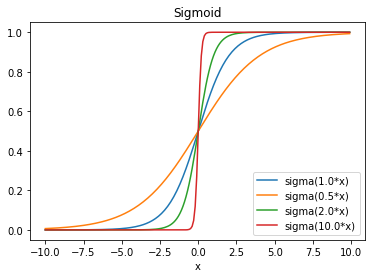

In [1]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
x = numpy.arange(-10,10,0.1)
scales = [1.0,0.5,2.0,10.0]
labels = []
for s in scales:
    plt.plot(x,1.0/(1.0 + numpy.exp(-s*x)))
    labels.append('sigma(' + str(s) +'*x)')
plt.xlabel('x')
plt.title('Sigmoid')
plt.legend(labels,loc=4)

# Some useful equalities involving sigmoid
Definition:
$$
\sigma(z) = \frac{1}{1  + \exp(-z)}
$$

Recognize the alternative way to write it:
$$
\sigma(z) = \frac{\exp z}{1 + \exp z} 
$$
Complement is just flip of the sign in the argument
$$
\sigma(-z) = 1 - \sigma(z) 
$$
Log ratio of probability (log odds) 
$$
\log \frac{\sigma(z)}{\sigma(-z)} = z
$$




# Using sigmoid to parameterize Bernoulli

$$
p(y=1|\theta) = \theta
$$

Sigmoid "squashes" the whole real line into range $[0,1]$.

Hence we can map weighted features into a parameter $\theta$
$$
\theta = \sigma(\beta_0 + \xx^T\beta) 
$$
and use that $\theta$  in our Bernoulli
$$
p(y=1\given\theta=\sigma(\beta_0 + \xx^T\beta) ) = \sigma(\beta_0 + \xx^T\beta) 
$$



# Logistic regression 

In logistic regression we model a binary variable $\color{red}{y \in \{-1,+1\}}$
$$
\begin{aligned}
p({\color{blue}{y=+1}}\given\xx,\beta_0,\beta) &= \sigmoid{{\color{blue}{+}}(\beta_0 + \xx^T\beta)}\\
p({\color{red}{y=-1}}\given\xx,\beta_0,\beta) &= 1 - \sigmoid{-(\beta_0 + \xx^T\beta)} = \sigmoid{{\color{red}{-}}(\beta_0 + \xx^T\beta)} 
\end{aligned}
$$
This is equivalent to
$$
p(y\given\xx,\beta_0,\beta) = 
\sigmoid{{\color{green}{y}}(\beta_0 + \xx^T\beta)} = 
\frac{1}{1 + \myexp{-y(\beta_0 + \xx^T\beta)}}
$$


Q: Does above formula work for $y \in \{0,1\}$?



# Logistic regression -- log-likelihood

Probability of a single sample is:
$$
p(y\given\xx,\beta_0,\beta) = \frac{1}{1 + \myexp{-y(\beta_0 + \xx^T\beta)}}
$$

Likelihood function is:
$$
\likelihood(\beta_0,\beta\given\yy,\xx) = \prod_i \frac{1}{1 + \myexp{-y_i(\beta_0 + \xx_i^T\beta)}}
$$

Log-likelihood function is:
$$
\loglik(\beta_0,\beta\given\yy,\xx) = -\sum_i \log\left\{1 + \myexp{-y_i(\beta_0 + \xx_i^T\beta)} \right\}
$$

# Interpreting weights in logistic regression

Q: When is $\frac{1}{1 + \myexp{-(\beta_0 + \xx^T\beta)}} = 0.5?$

Q: What does this set of $\xx$ look like?

# Separating hyperplanes

![Separating Hyperplane](separating.png)

# Convergence of optimization of logistic regression

If there exists a hyperplane that splits the data perfectly, then log-likelihood can be indefinitely impoved driving weights to infinity.


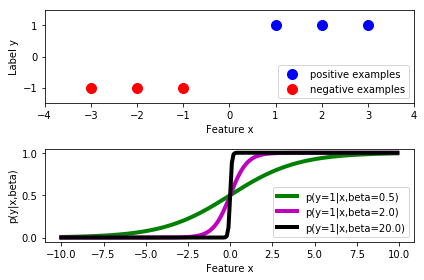

In [2]:
import numpy
import matplotlib.pyplot as plt

def plot_data(xs,ys):
    pos = [i for i in range(len(ys)) if ys[i]>0]
    neg = [i for i in range(len(ys)) if ys[i]<0]
    plt.plot(xs[pos],ys[pos],'b.',
             markersize=20.,
             label='positive examples')
    plt.plot(xs[neg],ys[neg],'r.',
             markersize=20.,
             label='negative examples')

def plot_sigmoid(s,color):
    x = numpy.arange(-10.0,10.0,0.1)
    plt.plot(x,1.0/(1.0 + numpy.exp(-s*x)),color,
             linewidth = 4.,
             label='p(y=1|x,beta='+str(s)+')')
ys = numpy.asarray([-1.0,-1.0,-1.0,1.0,1.0,1.0])
xs = numpy.asarray([-3.0,-2.0,-1.0,1.0,2.0,3.0])
plt.subplot(2,1,1)
plot_data(xs,ys)
plt.ylim([-1.5,1.5])
plt.xlim([-4.0,4.0])
plt.xlabel('Feature x')
plt.ylabel('Label y')
plt.legend(loc=4)

plt.subplot(2,1,2)
plot_sigmoid(0.5,'g')
plot_sigmoid(2.0,'m')
plot_sigmoid(20.0,'k')
plt.legend(loc=4)
plt.xlabel('Feature x')
plt.ylabel('p(y|x,beta)')
plt.tight_layout()


# Ridge penalty and logistic regression

Adding ridge penalty to the logistic regression achieves
1. Shrinkage of weights -- weights no longer explode in separable case
2. Even splitting between correlated weights



# Bayesian view of penalties

We have seen two examples of supervised models
1. Linear regression, $p(y|\xx,\beta)$ where $y \in \mathbb{R}$
2. Logistic regression, $p(y|\xx,\beta)$ where $y \in \{-1,+1\}$

We then ut log-likelihoods
$$
\loglik(\beta|\yy,X) = \sum_i \log p(y_i|\xx_i,\beta)
$$
and observed that we can add penalties to log-likelihoods
$$
\loglik(\beta|\yy,X) + \lambda f(\beta)
$$
in order to deal with ill-posedness of the problems.


# Bayesian view of penalties

Given a likelihood
$$
p(\Data\given\theta)
$$
Bayesian view of models treats each parameter $\theta$  as just another random variable.


This random variable has a distribution called **prior** distribution
$$
p(\theta)
$$

Using Bayes rule we can also compute
$$
\overbrace{p(\theta\given\Data)}^{\textrm{posterior}} = \frac{
\overbrace{p(\Data\given \theta)}^{\textrm{likelihood}}
\overbrace{p(\theta)}^{\textrm{prior}}} {p(\Data)}
$$
called **posterior** distribution.

**Prior** encodes our beliefs **before** seing the data. 

**Posterior** reflects our updated beliefs **after** seeing the data.




# Bayesian view of penalties -- Gaussian prior and linear regression

For example we can assume a Gaussian **prior** on $\beta_i$ 
$$
\begin{aligned}
\beta_i &\sim \Gaussian{0}{\frac{1}{\lambda}},& i>0\\
y &\sim \Gaussian{\beta_0  + \xx^T\beta}{\sigma^2}
\end{aligned}
$$

Then posterior probability of the parameter $\beta_i$:
$$
p(\beta \given \yy,\xx) = \frac{ p(\yy\given\xx,\beta)p(\beta) }{p(\yy\given\xx)}
$$



# Bayesian view of penalties 
We can now try to find Maximum-A-Posteriori (MAP) estimate of $\theta$ 
$$
\arg\max_\beta p(\beta \given \yy,\xx) = \arg\max_\beta \log p(\yy\given\xx,\beta) + \log p(\beta) 
$$
and this is equivalent to
$$
\arg\max_\beta p(\beta \given \yy,\xx) = \arg\max_\beta - \sum_{i=1}^N \frac{1}{2\sigma^2}(y_i - \beta_0 - \xx_i^T\beta) - \sum_{j=1}^p \frac{\lambda}{2}\beta_j^2 +  \textrm{const}
$$


Solving ridge regression is equivalent to finding Maximum-A-Posteriori estimate in Bayesian linear regression with Gaussian prior on weights.

# Bayesian view of penalties

Penalties are log-probabilities of the parameters.

Maximiziation of penalized log-likelihood is equivalent to maximizing posterior probability of the parameters.

Further, uncertainty about parameters can be quantified once we have a distribution
$$
p(\theta\given\Data)
$$
instead of just maximum likelihood estimate.


# HW1 overview -- submission

Submit your .ipynb file to **jsilva@cs.unc.edu**
Give us your name, PID. Working in pairs is fine. List the name of your co-worker.

```
To: jsilva@cs.unc.edu
From: Super Student
Subject: HW1 submission

First Name: Super
Last Name: Student
PID: 11111111

Colaborated with: 
First Name: Another
Last Name: Student
```

# HW1 overview -- submission

The HW1 will be up at midgnight tonight.  

You will have until 11:59PM 9/16 to submit.

TAs office hours will be on Wednesday 


You can submit as many times as you want.

The last one will be graded. 

We will look at the submitted files periodically and send comments when appropriate.

If you are stuck, send an e-mail to both jsilva@cs and poirson@cs 

We will **not** debug your code. We might suggest things to think about. 
**Hints might help or hinder.**

# HW1 a brief look


# Today

1. Review regularized/penalized linear regression
2. Introduce sigmoid and logistic regression
3. Geometric interpretation of logistic regression
4. Bayesian view of regularized methods

